In [ ]:
'''
This notebook explains -
A.0. How to generate new audio wave using sin/cosine function
A. How to load the aduio from audio file
B. How to plot different plots (as mentioned below) for given audio file
C. How to mix audio signals together
D. How to save audio samples into audio file
E. How to get Audio/Video metadata for given audio/video


In audio signal/wave, there are 3 main attributes consist of:
A. time
B. Amplitude
C. frequency

There are three different Plots/graphs to understnad relationshipt between different domain
A. FFC Plot -> Between Frequnecy and Magnitude/Amplitude domain
B. Wave plot -> Between Time and Amplitude sample values
C. Wave plot -> Between Time and Amplitude DB values
D. MFCC Plot -> Between Time (on X-Axis), Frequency (On y-axis) and Amplitude values in the graph

'''

In [ ]:
!pip install librosa==0.6.3
#!pip install librosa==0.7.2

In [2]:
import librosa
print("librosa", librosa.__version__)

librosa 0.7.2


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import librosa
import numpy as np
from IPython.display import Audio
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#import noisereduce as nr

Using TensorFlow backend.


D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


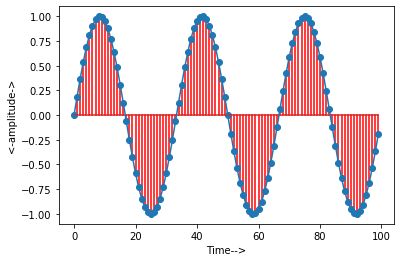

In [15]:
# Wave plot between time and amplitude
samples = 100
f = 3
x = np.arange(samples)
y1=np.sin(2*np.pi*f*(x/samples))

plt.figure()
plt.stem(x,y1, 'r',)
plt.plot(x,y1)
plt.xlabel("Time-->")
plt.ylabel('<-amplitude->')
plt.show()

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


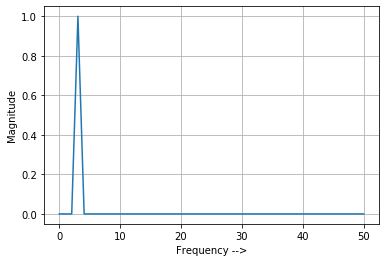

In [17]:
# Wave plot between frequency and amplitude

import scipy
def fft_plot(audio, sampling_rate):
    n=len(audio)
    T=1/sampling_rate    
    yf=scipy.fft(audio)        
    xf=np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig,ax = plt.subplots()
    ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

fft_plot(y1,samples)

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


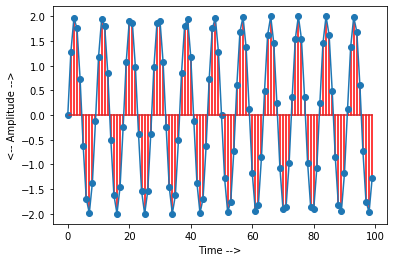

In [12]:
samples_1 = 100
f=11
x=np.arange(samples_1)
y2 = 2 * np.sin(2*np.pi*f*(x/samples_1))
plt.figure()
plt.stem(x,y2,'r')
plt.plot(x,y2)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


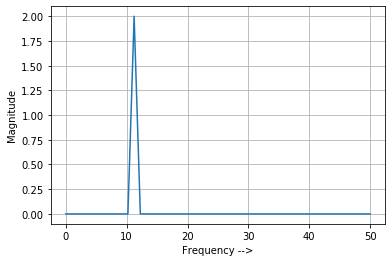

In [13]:
fft_plot(y2,100)

In [19]:
y3=y1+y2

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


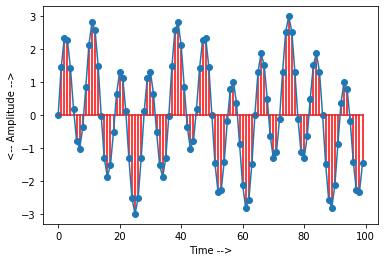

In [20]:
plt.figure()
plt.stem(x,y3,'r')
plt.plot(x,y3)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

D:\Users\344929\Anaconda3\envs\kerasCPU3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


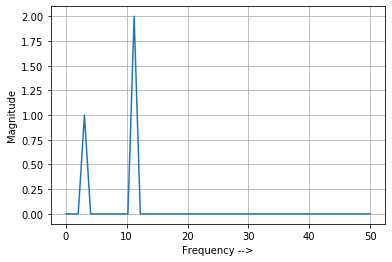

In [11]:
fft_plot(y3,100)

In [4]:
file_path='1995-1826-0003.wav'
samples, sampling_rate=librosa.load(file_path,sr=None, mono=True, offset=0.0, duration=None)
audio_duration = len(samples)/sampling_rate

print('duration of audio in seconds: ', audio_duration)
len(samples), sampling_rate

duration of audio in seconds:  3.09


(49440, 16000)

In [5]:
from IPython.display import Audio
Audio(file_path)

In [ ]:
# To Save into Audio Wav file 
librosa.output.write_wav('signal_wave.wav', samples, sampling_rate)

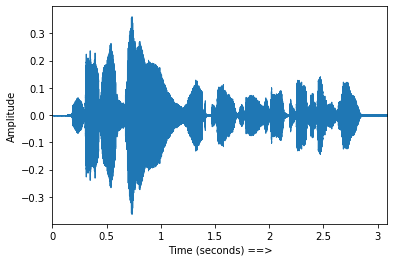

In [6]:
#Librosa Wave plot between time and amplitude

from librosa import display
plt.figure()
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("Time (seconds) ==>")
plt.ylabel("Amplitude")
plt.show()

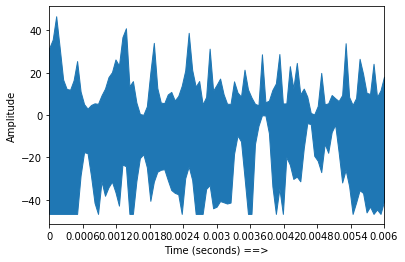

In [8]:
#Librosa Wave plot between time and amplitude after converting amplitude int DB values.

hop_length = 512
n_fft = 2048

from librosa import display
X = librosa.stft(samples,n_fft=n_fft, hop_length=hop_length)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure()
librosa.display.waveplot(y=Xdb, sr=sampling_rate)
plt.xlabel("Time (seconds) ==>")
plt.ylabel("Amplitude")
plt.show()

D:\Users\344929\Anaconda3\envs\kerasCPU3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


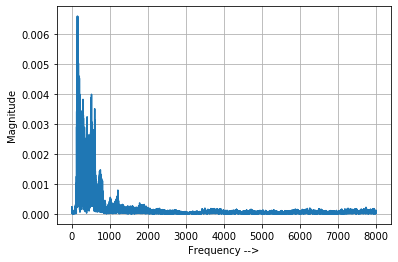

In [15]:
fft_plot(samples, sampling_rate)

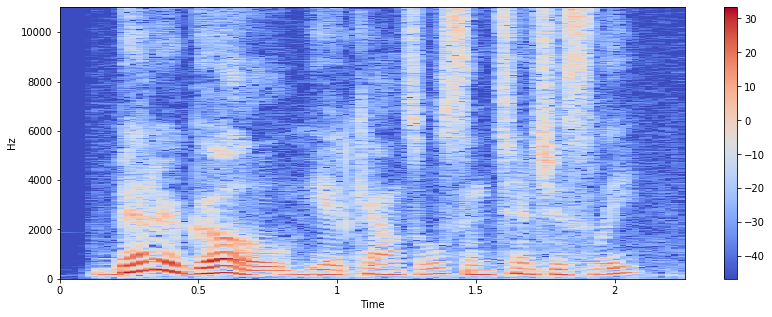

In [5]:
# MFCC Plot between Time (on X-Axis), Frequency (On y-axis) nad Amplitude in the graph 

hop_length = 512
n_fft = 2048
sr=22050
X = librosa.stft(samples,n_fft=n_fft, hop_length=hop_length)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [7]:
# This Section is to get the metadata information of a video

from pymediainfo import MediaInfo
import cv2

vid = cv2.VideoCapture('D:/Abhishek/Machine Learning Models/Deep Learning/Sample_Videos/black_chennai.mp4')
print('height = ', vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('width = ', vid.get(cv2.CAP_PROP_FRAME_WIDTH))

media_info = MediaInfo.parse('D:/Abhishek/Machine Learning Models/Deep Learning/Sample_Videos/black_chennai.mp4')

for track in media_info.tracks:
    print('****************************')
    if track.track_type == 'Video':
        print ("Resolution {}x{}".format(track.width, track.height))
        dataInfo = track.to_data()
        for key in track.to_data().keys():
            print(key,  ' : ' , dataInfo[key])
    elif track.track_type == 'Audio':
        dataInfo = track.to_data()
        for key in track.to_data().keys():
            print(key,  ' : ' , dataInfo[key])

height =  144.0
width =  256.0
****************************
****************************
Resolution 256x144
track_type  :  Video
count  :  378
count_of_stream_of_this_kind  :  1
kind_of_stream  :  Video
other_kind_of_stream  :  ['Video']
stream_identifier  :  0
streamorder  :  0
track_id  :  1
other_track_id  :  ['1']
format  :  AVC
other_format  :  ['AVC']
format_info  :  Advanced Video Codec
format_url  :  http://developers.videolan.org/x264.html
commercial_name  :  AVC
format_profile  :  High@L1.2
format_settings  :  CABAC / 4 Ref Frames
format_settings__cabac  :  Yes
other_format_settings__cabac  :  ['Yes']
format_settings__reference_frames  :  4
other_format_settings__reference_frames  :  ['4 frames']
internet_media_type  :  video/H264
codec_id  :  avc1
codec_id_info  :  Advanced Video Coding
duration  :  50084
other_duration  :  ['50 s 84 ms', '50 s 84 ms', '50 s 84 ms', '00:00:50.084', '00:00:50;01', '00:00:50.084 (00:00:50;01)']
bit_rate  :  54653
other_bit_rate  :  ['54.7 kb/s